# Exploratory Data Analysis - Sports



### Problem Statement:



● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’



● As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.



● Suggest teams or players a company should endorse for its products.



### By: Venkat Vinay Randhi 

In [170]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing and cleaning the Data Sets

In [171]:
#Reading deliveries Data Set.

deliveries = pd.read_csv('deliveries.csv')

In [172]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [173]:
#Number of rown and columns in deliveries data set.

print(deliveries.shape)
print('Deliveries dataset has',deliveries.shape[0],'records and',deliveries.shape[1],'columns')

(179078, 21)
Deliveries dataset has 179078 records and 21 columns


In [174]:
#Checking for Duplicated records.

deliveries.duplicated().sum()

23

- There are 23 duplicated records in the deliveries dataset

In [175]:
#Removing the duplicated records.

deliveries.drop_duplicates(keep='first',inplace=True)

In [176]:
#Number of records after removing the duplicated records.

deliveries.shape[0]

179055

In [177]:
#Checking for null records.

deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

- Since, all the null values are only present in player_dismissed, dismissal_kind and fielder, it is not required to treat them.

In [178]:
#Reading matches Data Set.

matches = pd.read_csv('matches.csv')

In [179]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [180]:
#Number of rows and columns in the matches data set.

print(matches.shape)
print('matches data set has',matches.shape[0],'records and',matches.shape[1],'colums.')

(756, 18)
matches data set has 756 records and 18 colums.


In [181]:
#Checking for duplicated records.

matches.duplicated().sum()

0

- There are no duplicated records present in the matches data set.

In [182]:
#Checking for null records.

matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [183]:
#Filling the missing records

matches[matches.city.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [184]:
#We can observe that all missing records in the city column have Dubai International Cricket Stadium as the venue

#Hence, we can conclude that all the missing values in the city column can be filled with Dubai.

matches.city.fillna('Dubai',inplace=True)

In [185]:
matches[(matches.winner.isnull()) & (matches.player_of_match.isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


- Since, there is no match result for the records where winner column has null values, no null value treatment is needed.


- We can conclude the same for the tratement of null values in the player_of_match column.


- As all the remaining columns with null values will have no effect in the analysis, we can ignore them.

In [186]:
#Number of null values after treating them.

matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [187]:
#Removing unnecessary columns.

matches.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)

In [188]:
#Adding columns for analysis.

matches['loser']=matches.apply(lambda a: a['team2'] if a['team1'] == a['winner'] else a['team1'], axis=1)

In [189]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,loser
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,Mumbai Indians
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Gujarat Lions
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,Rising Pune Supergiant
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Delhi Daredevils


### Extracting relevant data for analysis.

In [190]:
#Creating table team_stats which displays the team performance through the season.

wins_per_season = pd.DataFrame(matches.groupby('season').winner.value_counts()).rename(columns={'winner':'wins'}).reset_index()

loses_per_season = pd.DataFrame(matches.groupby('season').loser.value_counts()).rename(columns={'loser':'loses'}).reset_index()

team_stats = pd.merge(wins_per_season,loses_per_season,left_on=('season','winner'),right_on=('season','loser')).drop(columns='loser').rename(columns={'winner':'team'})

team_stats.insert(2,'matches_played',team_stats['wins']+team_stats.loses)

team_stats['win_loss_ratio']=team_stats.wins/team_stats.loses

In [191]:
team_stats

,season,team,matches_played,wins,loses,win_loss_ratio
0,2008,Rajasthan Royals,16,13,3,4.333333
1,2008,Kings XI Punjab,15,10,5,2.000000
2,2008,Chennai Super Kings,16,9,7,1.285714
3,2008,Delhi Daredevils,14,7,7,1.000000
4,2008,Mumbai Indians,14,7,7,1.000000
...,...,...,...,...,...,...
95,2019,Kings XI Punjab,14,6,8,0.750000
96,2019,Kolkata Knight Riders,14,6,8,0.750000
97,2019,Sunrisers Hyderabad,15,6,9,0.666667
98,2019,Rajasthan Royals,13,5,8,0.625000


In [195]:
#Extraction of Batting statistics.

runs = pd.merge(deliveries.groupby('batsman')['batsman_runs'].sum(),
        deliveries[(deliveries.wide_runs==0) & (deliveries.noball_runs==0) &
          (deliveries.penalty_runs==0)].batsman.value_counts(),left_index=True,right_index=True).rename(
    columns={'batsman_runs':'runs_scored','batsman':'balls_faced'}).sort_values('runs_scored',ascending=False)

runs['strike_rate'] = runs.runs_scored/runs.balls_faced*100

matches_played = pd.DataFrame(deliveries.groupby('match_id')
                              .batsman.value_counts()).drop('batsman',
                                                            axis=1).reset_index(level=1).batsman.value_counts()

batting_stats = pd.merge(runs,matches_played,left_index=True,right_index=True).rename(columns=
                                                                                      {'batsman':'matches_played'})

batting_stats['batting_average'] = batting_stats['runs_scored']/batting_stats['matches_played']

batting_stats.rename(columns={'matches_played':'Number_of_matches_batted'},inplace=True)

batting_stats.head()

,runs_scored,balls_faced,strike_rate,Number_of_matches_batted,batting_average
V Kohli,5434,4100,132.536585,169,32.153846
SK Raina,5415,3898,138.917394,189,28.650794
RG Sharma,4914,3731,131.707317,182,27.000000
DA Warner,4741,3290,144.103343,126,37.626984
S Dhawan,4631,3658,126.599235,158,29.310127


In [196]:
#Extraction of Bowling statistics.

total_wickets =pd.DataFrame(deliveries[deliveries.player_dismissed.notnull()].
                            bowler.value_counts()).rename(columns={'bowler':'number_of_wickets'})

bowling_stats = pd.merge(total_wickets,
        pd.DataFrame(deliveries[deliveries.extra_runs==0].groupby('match_id').bowler.value_counts()).
         rename(columns={'bowler':'number_of_deliveries'}).reset_index().groupby('bowler').number_of_deliveries.sum(),
        left_index=True,right_index=True)

bowling_stats = pd.merge(bowling_stats,pd.DataFrame(deliveries[deliveries.extra_runs==0].groupby(['match_id']).
             bowler.value_counts()).drop(columns='bowler').reset_index().bowler.value_counts(),
        left_index=True,right_index=True).rename(columns={'bowler':'number_of_matches_bowled'})

bowling_stats = pd.merge(bowling_stats,
         deliveries[(deliveries.bye_runs == 0) & (deliveries.legbye_runs == 0)].groupby('bowler').total_runs.sum(),
         left_index=True,right_index=True).rename(columns={'total_runs':'total_runs_conceeded'})

bowling_stats['bowling_average'] = bowling_stats.total_runs_conceeded/bowling_stats.number_of_wickets

bowling_stats['bowling_strike_rate']=bowling_stats.number_of_deliveries/bowling_stats.number_of_wickets

bowling_stats.insert(2,'overs_bowled',value=round(bowling_stats.number_of_deliveries/6,2))

bowling_stats['bowling_economy']=bowling_stats.total_runs_conceeded/bowling_stats.overs_bowled

bowling_stats.head()

,number_of_wickets,number_of_deliveries,overs_bowled,number_of_matches_bowled,total_runs_conceeded,bowling_average,bowling_strike_rate,bowling_economy
SL Malinga,188,2753,458.83,122,3381,17.984043,14.643617,7.368742
DJ Bravo,168,2535,422.50,131,3651,21.732143,15.089286,8.641420
A Mishra,165,3069,511.50,147,3802,23.042424,18.600000,7.433040
Harbhajan Singh,161,3325,554.17,157,3976,24.695652,20.652174,7.174694
PP Chawla,156,3093,515.50,156,4073,26.108974,19.826923,7.901067


- bowling_average is the average total number of runs conceeded to get a wicket.


- bowling_strike_rate is the average number of balls bowled to get a wicket.


- bowling_economy is average of total runs conceeded per over.

In [197]:
#Player statistics.

player_statistics = pd.merge(batting_stats,bowling_stats,left_index=True,right_index=True)

player_statistics.head()

,runs_scored,balls_faced,strike_rate,Number_of_matches_batted,batting_average,number_of_wickets,number_of_deliveries,overs_bowled,number_of_matches_bowled,total_runs_conceeded,bowling_average,bowling_strike_rate,bowling_economy
V Kohli,5434,4100,132.536585,169,32.153846,5,248,41.33,26,368,73.600000,49.600000,8.903944
SK Raina,5415,3898,138.917394,189,28.650794,30,889,148.17,69,1118,37.266667,29.633333,7.545387
RG Sharma,4914,3731,131.707317,182,27.000000,16,326,54.33,30,440,27.500000,20.375000,8.098656
S Dhawan,4631,3658,126.599235,158,29.310127,4,45,7.50,6,66,16.500000,11.250000,8.800000
CH Gayle,4560,2966,153.742414,124,36.774194,19,533,88.83,37,724,38.105263,28.052632,8.150400


# Univariate Analysis

### Analysis of team performance.

In [198]:
#Let's consider team_stats table for this analysis.

team_stats.head()

,season,team,matches_played,wins,loses,win_loss_ratio
0,2008,Rajasthan Royals,16,13,3,4.333333
1,2008,Kings XI Punjab,15,10,5,2.000000
2,2008,Chennai Super Kings,16,9,7,1.285714
3,2008,Delhi Daredevils,14,7,7,1.000000
4,2008,Mumbai Indians,14,7,7,1.000000


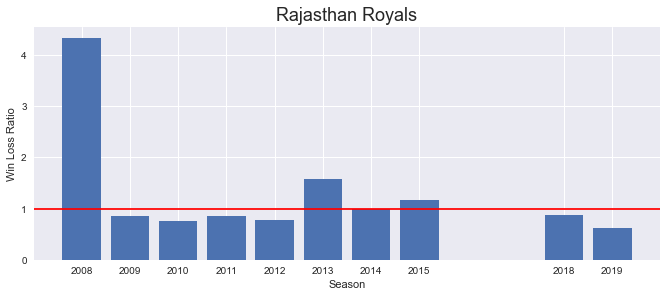

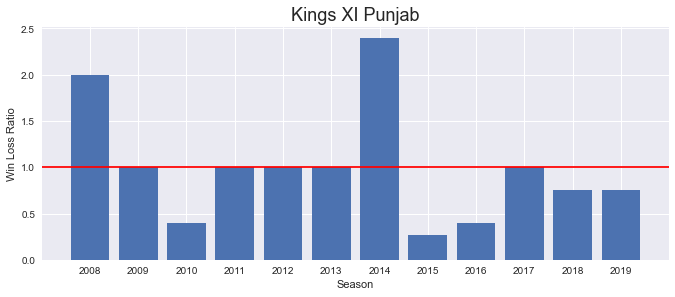

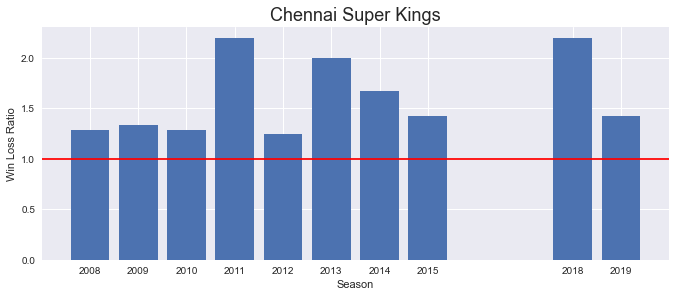

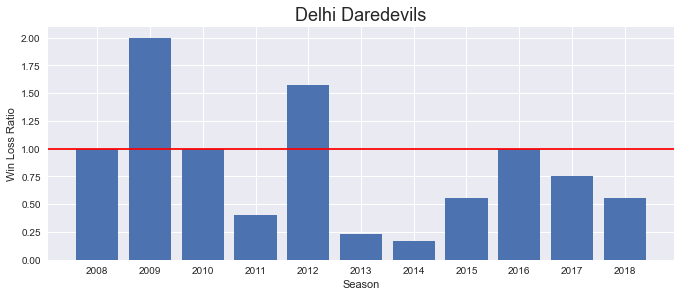

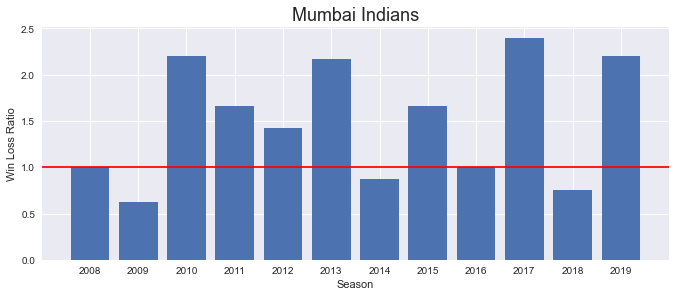

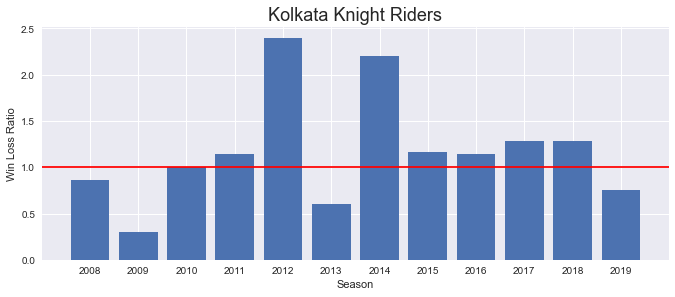

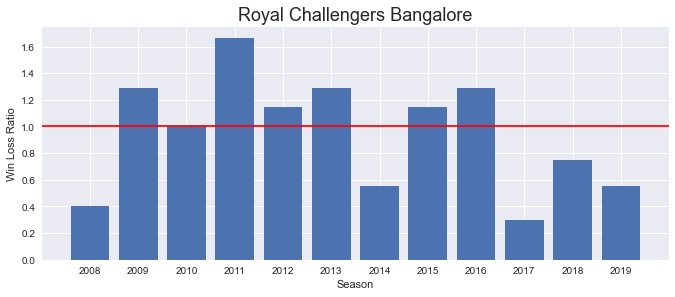

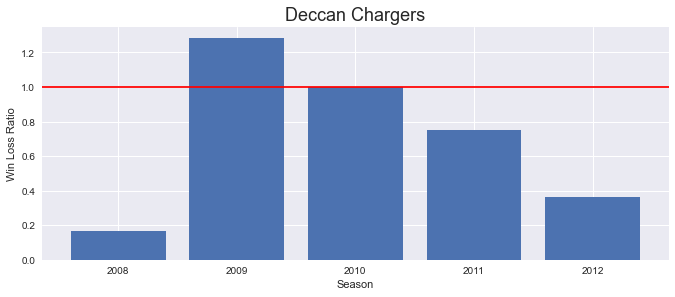

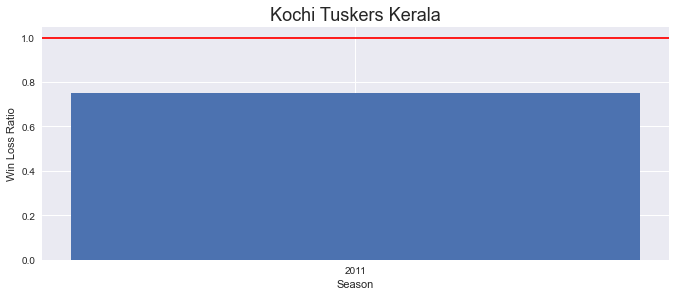

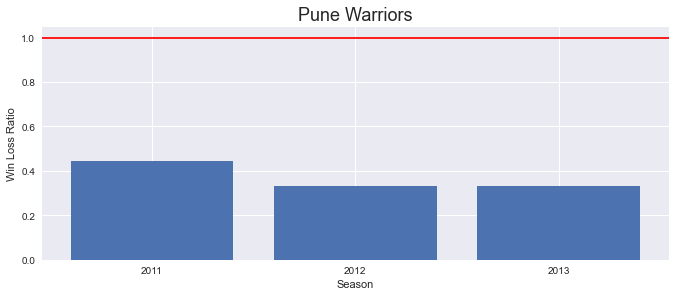

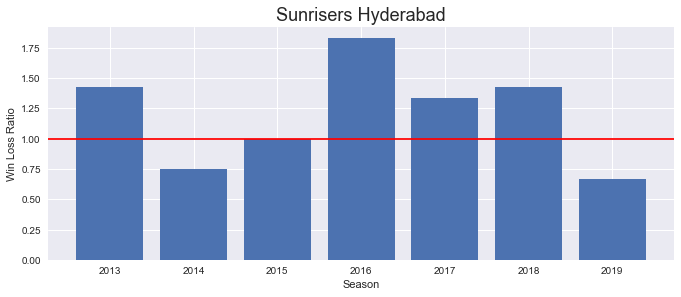

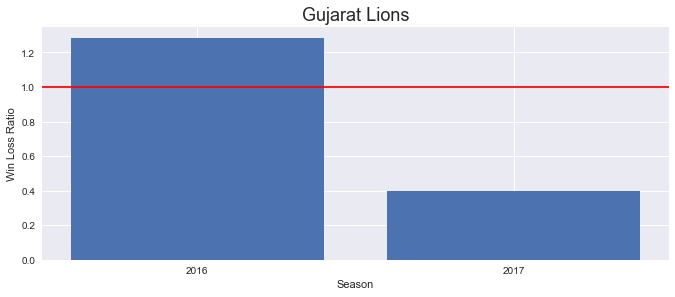

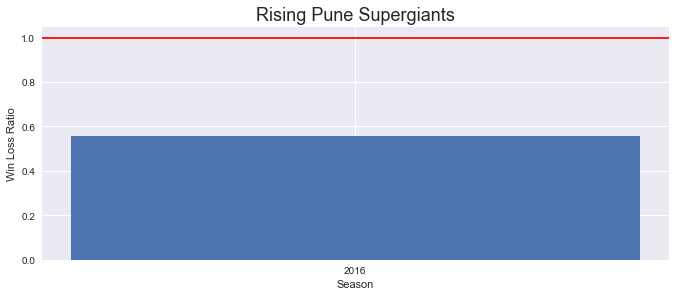

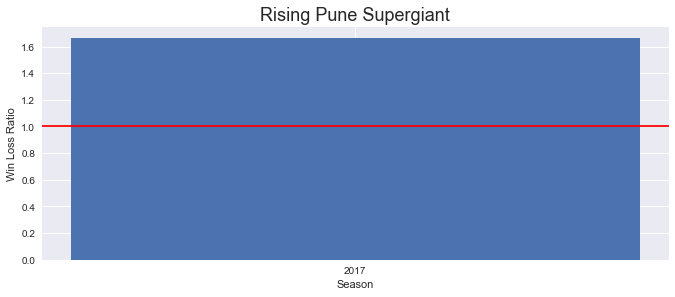

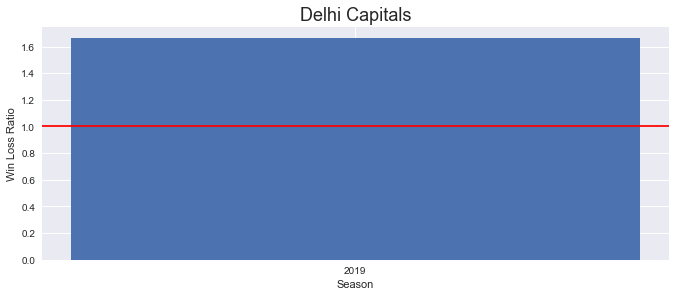

In [199]:
#Plots for win-loss ratio of each team through the seasons.
#Bar plot would be appropriate to analyze this data. We use matplotlib library to plot the data.
#Looping method is used to plot for each team


for i in team_stats.team.unique():
    plt.style.use('seaborn')   
    plt.figure(figsize=(10,4))  #Setting the size of the figure.
    plt.bar(team_stats[team_stats.team == i].season,
            team_stats[team_stats.team == i].win_loss_ratio,0.8,label='Wins') #Assigning variables to the bar plot

    plt.xticks(ticks=team_stats[team_stats.team == i].season)
    
    #labelling the plot
    plt.xlabel('Season')
    plt.ylabel('Win Loss Ratio')
    plt.axhline(1,c='r')   #Plot a horizontal line at the breakeven win loss ratio. i.e., 1
    plt.title(i,fontdict={'fontsize':18})
    plt.show()
    print('\n')

Text(0, 0.5, 'Team')

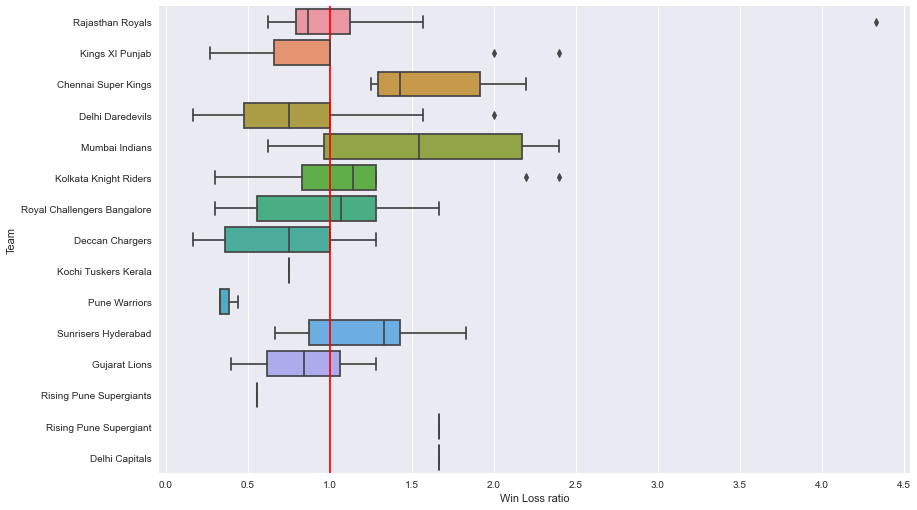

In [200]:
#We can use boxplot to compare the win loss ratio of all the teams.

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
sns.boxplot(team_stats.win_loss_ratio,team_stats.team)

plt.axvline(1,c='r')

plt.xticks(ticks = np.linspace(0,4.5,10))
plt.xlabel('Win Loss ratio')
plt.ylabel('Team')

In [201]:
#Median of win-loss ratio of each team through all the seasons.

pd.merge(team_stats.groupby('team').matches_played.sum(),team_stats.groupby('team').win_loss_ratio.median(),
        left_index=True,right_index=True).sort_values(['win_loss_ratio'],ascending=False).rename(
    columns={'win_loss_ratio':'average_win_loss_ratio'})

,matches_played,average_win_loss_ratio
team,,
Delhi Capitals,16,1.666667
Rising Pune Supergiant,16,1.666667
Mumbai Indians,187,1.547619
Chennai Super Kings,164,1.428571
Sunrisers Hyderabad,108,1.333333
Kolkata Knight Riders,178,1.142857
Royal Challengers Bangalore,179,1.071429
Kings XI Punjab,176,1.000000
Rajasthan Royals,145,0.866071


In [202]:
#Winner of each season.


season = []
winner = []

for i in matches.season.unique():
    season.append(i)
    winner.append(matches[matches.id == matches[matches['season']==i].id.max()].winner.values[0])

season_winner = pd.DataFrame(winner,season).rename(columns={0:'winner'}).sort_index()

season_winner

,winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


In [203]:
print('Number of Seasons won:\n\n',season_winner.winner.value_counts())

Number of Seasons won:

 Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64


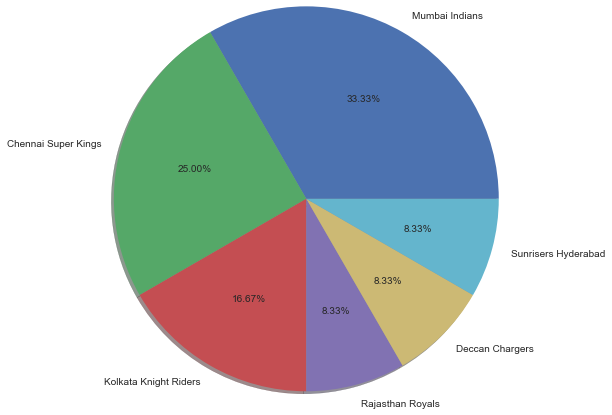

In [204]:
#Plot of the share of season wins of teams.
plt.style.use('seaborn')

plt.pie(season_winner.winner.value_counts(),radius=1.5,labels=season_winner.winner.value_counts().index,
       autopct="%.2f%%",shadow=True)

plt.show()

#### Inference


- From the above analysis, we can observe that the top 4 successful teams by the win-loss ratio are Mumbai Indians, Chennai Super Kings, Sunrisers Hyderabad and Kolkata Knight Riders. Since Delhi capitals and Rising Pune Supergiant have the low number of matches played, they are not considered in the list. 


- Among these top 4 teams, **Mumbai Indians** can be considered to be the most successful team as it played the highest number of matches, amongst the top teams with the highest win-loss ratio and has won 4 seasons.


### Analysis on winning conditions.

In [205]:
#Let's analyse importance of winning the toss to win the match.

toss = pd.merge(matches[['season','toss_winner','winner']]
         ,pd.DataFrame(matches.apply(lambda a: a['team2'] if a['team1'] == a['toss_winner'] else a['team1'], axis=1)),
        left_index=True,right_index=True).rename(columns={0:'toss_loser'})

toss.head()

,season,toss_winner,winner,toss_loser
0,2017,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad
1,2017,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
2,2017,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
3,2017,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
4,2017,Royal Challengers Bangalore,Royal Challengers Bangalore,Delhi Daredevils


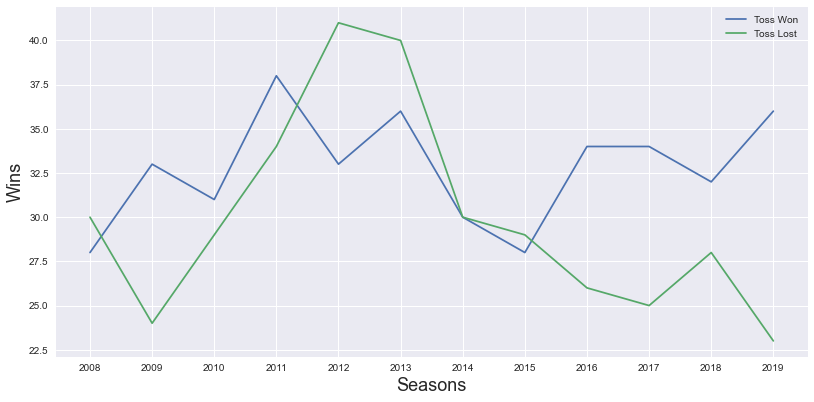

In [206]:
#Plotting a line graph to visualize the impact of toss on the result of the match.

plt.style.use('seaborn')
plt.figure(figsize=(12,6))

plt.plot(toss[toss.toss_winner == toss.winner].season.value_counts().sort_index().values,label='Toss Won')
plt.plot(toss[toss.toss_loser == toss.winner].season.value_counts().sort_index().values,label='Toss Lost')


#labelling
plt.xticks(ticks=[i for i in range(len(toss[toss.toss_winner == toss.winner].season.value_counts().index))],
           labels=toss[toss.toss_winner == toss.winner].season.value_counts().sort_index().index)
plt.xlabel('Seasons',fontdict={'fontsize':18})
plt.ylabel('Wins',fontdict={'fontsize':18})

plt.legend()


plt.show()

- We can observe that teams who won the toss have won the matches in the majority of seasons. 


- It is also noticed that the maximum impact of the toss is in the 2019 season where there is a huge difference between the teams who won after winning the toss and losing the toss.


- By this, we can concur that teams winning the toss have a higher chance of winning the match than the teams losing the toss.

In [207]:
#Let's analyse the trend of winning matches based on the toss decision.

toss_win = pd.crosstab(matches[matches.toss_winner == matches.winner].season,
            matches[matches.toss_winner == matches.winner].toss_decision).rename(columns={'bat':'wins_batting_first',
                                                                                         'field':'wins_bowling_first'})

#This table displays the number of times teams won based on their toss decision through the seasons.
toss_win

toss_decision,wins_batting_first,wins_bowling_first
season,,
2008,9,19
2009,19,14
2010,21,10
2011,11,27
2012,15,18
2013,21,15
2014,6,24
2015,14,14
2016,2,32


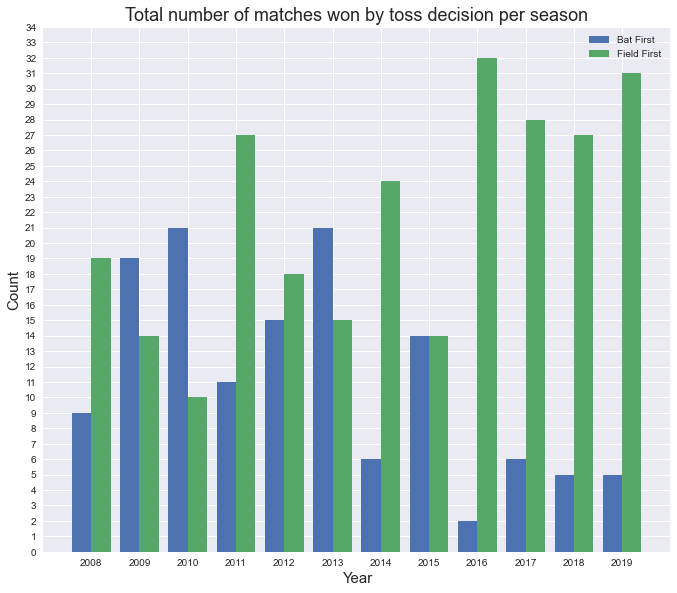

In [208]:
plt.style.use('seaborn')
plt.figure(figsize=(10,9))

#Plotting
plt.bar(toss_win.index,toss_win.wins_batting_first,0.4,label = 'Bat First')
plt.bar(0.4+toss_win.index,toss_win.wins_bowling_first,0.4, label = 'Field First')

#Labelling
plt.yticks([i for i in range(35)])
plt.xticks(ticks=toss_win.index+0.2,labels=toss_win.index)
plt.xlabel('Year',fontdict={'fontsize':15})
plt.ylabel('Count',fontdict={'fontsize':15})

plt.title('Total number of matches won by toss decision per season',fontdict={'fontsize':18})
plt.legend()

plt.show()

- This is the trend of teams who won the matches based on their toss decision. 


- We can observe that during the initial stages of the league, teams who opted to bat first won significant matches and as the seasons progressed, there is a downward trend of teams winning after choosing to bat first and an upward trend of the teams winning after winning the toss and choosing to bowl first. 


- It can be inferred from this data that teams who won the toss and opted to bowl first has won more number of matches that the teams opted to bat first as the league progressed.

In [209]:
extras = pd.merge(pd.DataFrame(deliveries[(deliveries.bye_runs==0)&
                        (deliveries.legbye_runs==0)].groupby(['match_id',
                                                              'bowling_team']).extra_runs.sum()).reset_index(),
        matches[['id','winner']],left_on='match_id',right_on='id').drop(columns='id').set_index(['winner','match_id'])

extras = pd.merge(pd.DataFrame(extras.reset_index().groupby('match_id').extra_runs.max()).reset_index(),
                  extras.reset_index(),
        on=(['match_id','extra_runs']),how='left').rename(
    columns={'bowling_team':'team_with_max_extra_runs_conceeded','winner':'match_winner'})

extras.head()

,match_id,extra_runs,match_winner,team_with_max_extra_runs_conceeded
0,1,6,Sunrisers Hyderabad,Royal Challengers Bangalore
1,2,6,Rising Pune Supergiant,Rising Pune Supergiant
2,3,11,Kolkata Knight Riders,Gujarat Lions
3,4,9,Kings XI Punjab,Rising Pune Supergiant
4,5,4,Royal Challengers Bangalore,Delhi Daredevils


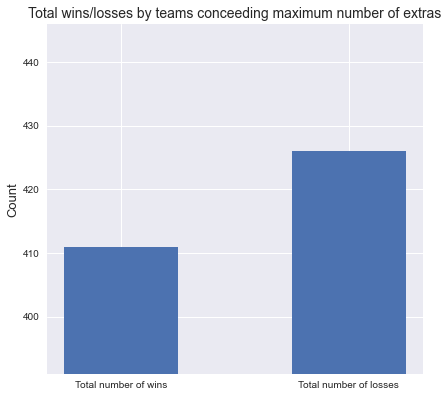

In [210]:
values = [extras[extras.team_with_max_extra_runs_conceeded == extras.match_winner]['match_winner'].count(),
       extras[extras.team_with_max_extra_runs_conceeded != extras.match_winner]['match_winner'].count()]

#Plotting
plt.figure(figsize=(6,6))
plt.style.use('seaborn')

#Scale
plt.ylim(min(values)-20,max(values)+20) #Limiting the scale

plt.bar(x=['Total number of wins','Total number of losses'],height=values,width=0.5)

#Labelling
plt.title('Total wins/losses by teams conceeding maximum number of extras',fontdict={'fontsize':14})
plt.ylabel('Count',fontdict={'fontsize':13})

plt.show()

- We can observe that, teams conceeding less total of extra runs have a slightly better chance of winning than teams conceeding more total extra runs.

### Analysis of Player statistics.

In [211]:
batting_stats.sort_values(['runs_scored','batting_average','strike_rate'],ascending=False).head(20)

,runs_scored,balls_faced,strike_rate,Number_of_matches_batted,batting_average
V Kohli,5434,4100,132.536585,169,32.153846
SK Raina,5415,3898,138.917394,189,28.650794
RG Sharma,4914,3731,131.707317,182,27.000000
DA Warner,4741,3290,144.103343,126,37.626984
S Dhawan,4631,3658,126.599235,158,29.310127
CH Gayle,4560,2966,153.742414,124,36.774194
MS Dhoni,4477,3199,139.949984,170,26.335294
RV Uthappa,4444,3366,132.026144,170,26.141176
AB de Villiers,4428,2902,152.584425,142,31.183099
G Gambhir,4223,3394,124.425457,151,27.966887


- These are the top 20 players ordered by their total runs scored, strike rate and the batting average. We can infer that these players can be most marketable personalities considering their batting performances. 

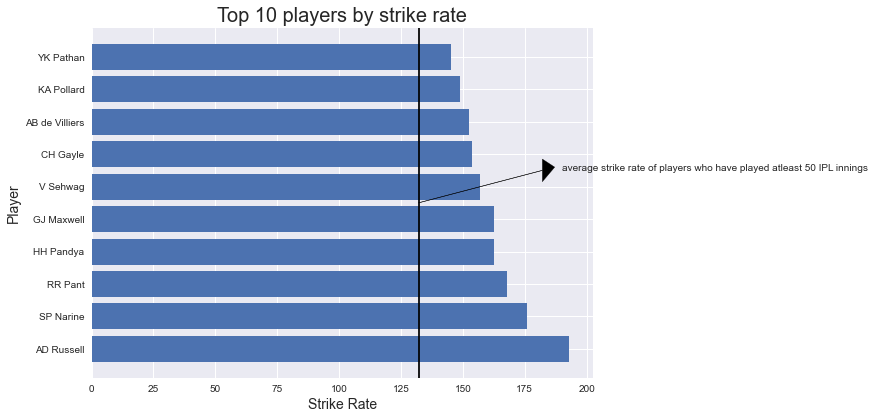

In [372]:
plt.figure(figsize=(8,6))
plt.barh(y=batting_stats[batting_stats.Number_of_matches_batted>50].
         sort_values('strike_rate',ascending=False).head(10).index,
       width = batting_stats[batting_stats.Number_of_matches_batted>50].
         sort_values('strike_rate',ascending=False).head(10).strike_rate,linewidth=0.5)

plt.axvline(batting_stats[batting_stats.Number_of_matches_batted>50].strike_rate.mean(),c='black')

plt.xlabel('Strike Rate',fontdict={'fontsize':14})
plt.ylabel('Player',fontdict={'fontsize':14})
plt.title('Top 10 players by strike rate',fontdict={'fontsize':20})
plt.arrow(132.0931745797435,4.5,50,1,head_width=0.7,width=0.01,head_length=5,color='black')
plt.annotate('average strike rate of players who have played atleast 50 IPL innings',(190,5.5))

plt.show()

- These are the top 10 players with highest strike rate and has played atleast 50 IPL innings.

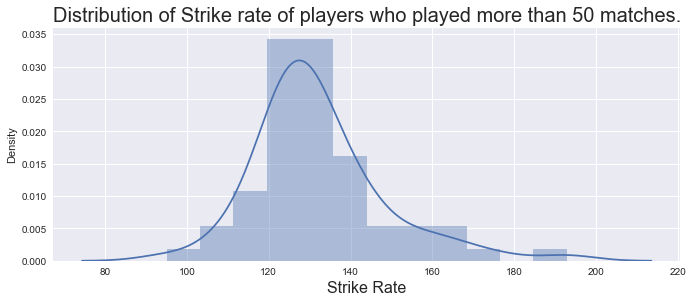

In [213]:
#PLotting
plt.figure(figsize=(10,4))
sns.distplot(batting_stats[batting_stats.Number_of_matches_batted>50].strike_rate)

#Labelling
plt.title('Distribution of Strike rate of players who played more than 50 matches.',fontdict={'fontsize':20})
plt.xlabel('Strike Rate',fontdict={'fontsize':16})
plt.show()

- By this plot we can infer that, most of the players who have played more than 50 innings maintain the strike rate between 120 and 140. It is possible that this criteria has a weightage to acquire their spot in the playing 11.

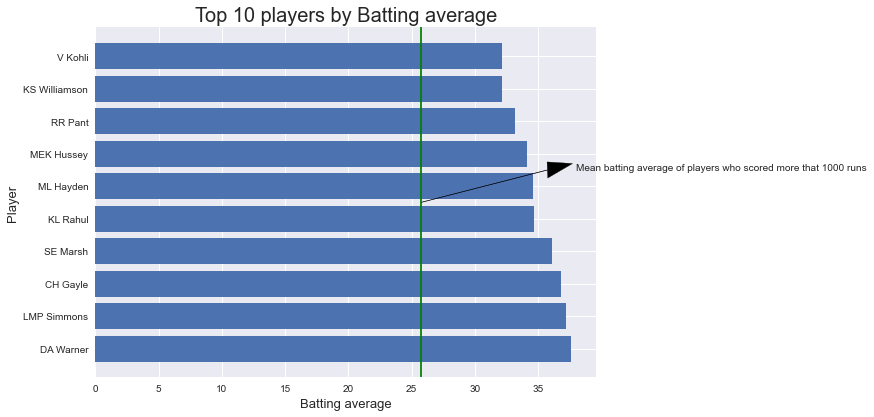

In [332]:
#Plotting
plt.figure(figsize=(8,6))
plt.barh(y=batting_stats[batting_stats.runs_scored>1000].
         sort_values('batting_average',ascending=False).head(10).index,
       width =batting_stats[batting_stats.runs_scored>1000].
         sort_values('batting_average',ascending=False).head(10).batting_average,linewidth=0.5)

plt.axvline(batting_stats[batting_stats.runs_scored>1000].batting_average.mean(),c='g')

#Labelling
plt.xlabel('Batting average',fontdict={'fontsize':13})
plt.ylabel('Player',fontdict={'fontsize':13})
plt.title('Top 10 players by Batting average',fontdict={'fontsize':20})
plt.arrow(25.730769402874024,4.5,10,1,head_width=0.5,width=0.01,head_length=2,color='black')
plt.annotate('Mean batting average of players who scored more that 1000 runs',(38,5.5))

plt.show()

- These are the top 10 players by their batting average and has scored more than 1000 runs. This data can be used to analyse the player consistency of scoring runs.

In [215]:
batting_stats[(batting_stats.runs_scored>1000)&
              (batting_stats.Number_of_matches_batted>50)].sort_values(['runs_scored','batting_average'],
                                                                       ascending=False).head(10)

,runs_scored,balls_faced,strike_rate,Number_of_matches_batted,batting_average
V Kohli,5434,4100,132.536585,169,32.153846
SK Raina,5415,3898,138.917394,189,28.650794
RG Sharma,4914,3731,131.707317,182,27.000000
DA Warner,4741,3290,144.103343,126,37.626984
S Dhawan,4631,3658,126.599235,158,29.310127
CH Gayle,4560,2966,153.742414,124,36.774194
MS Dhoni,4477,3199,139.949984,170,26.335294
RV Uthappa,4444,3366,132.026144,170,26.141176
AB de Villiers,4428,2902,152.584425,142,31.183099
G Gambhir,4223,3394,124.425457,151,27.966887


- These are the top 10 successful batters in the league.

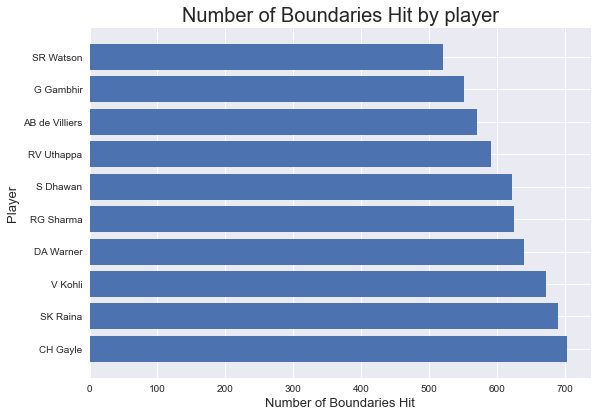

In [364]:
plt.figure(figsize=(8,6))

#Plotting
plt.barh(width=deliveries[deliveries.batsman_runs.isin([4,6])].groupby(['batsman']).batsman.count().sort_values(
    ascending=False).head(10),
         y=deliveries[deliveries.batsman_runs.isin([4,6])].groupby(['batsman']).batsman.count().sort_values(
    ascending=False).head(10).index,)

#Labelling
plt.xlabel('Number of Boundaries Hit',fontdict={'fontsize':13})
plt.ylabel('Player',fontdict={'fontsize':13})
plt.title('Number of Boundaries Hit by player',fontdict={'fontsize':20})

plt.show()

- These are the top 10 players by highest number of boundaries hit.

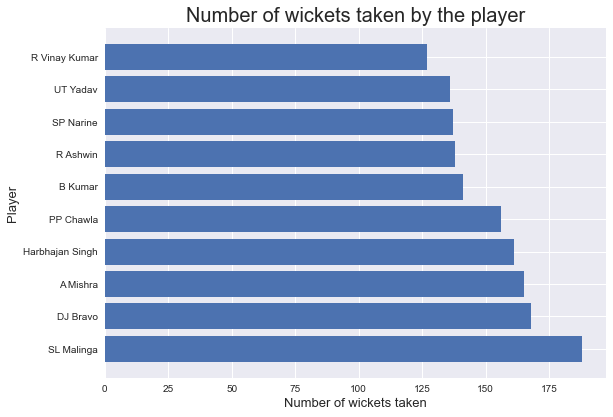

In [363]:
#Plotting

plt.figure(figsize=(8,6))

plt.barh(width=bowling_stats.number_of_wickets.sort_values(ascending=False).head(10),
         y=bowling_stats.number_of_wickets.sort_values(ascending=False).head(10).index,)


#Labelling
plt.xlabel('Number of wickets taken',fontdict={'fontsize':13})
plt.ylabel('Player',fontdict={'fontsize':13})
plt.title('Number of wickets taken by the player',fontdict={'fontsize':20})

plt.show()

- These are the number of wickets taken by the top 10 wicket takers.

In [367]:
#Sorting players who bowled in more than 50 matches by their bowling average.

bowling_stats[bowling_stats.number_of_matches_bowled>50].bowling_average.sort_values().head()

SL Malinga     17.984043
Imran Tahir    19.731707
A Nehra        20.619835
MM Patel       20.707317
SP Narine      20.963504
Name: bowling_average, dtype: float64

- The above are the top 5 players with best bowling average among the players who bowled in more than 50 matches.

In [368]:
#Sorting players who bowled in more than 50 matches by their bowling strike rate.

bowling_stats[bowling_stats.number_of_matches_bowled>50].bowling_strike_rate.sort_values().head()

SL Malinga     14.643617
Imran Tahir    14.804878
DJ Bravo       15.089286
A Nehra        15.520661
JP Faulkner    15.750000
Name: bowling_strike_rate, dtype: float64

- The above are the top 5 players with best bowling strike rate among the players who bowled in more than 50 matches.

## Bivariate Analysis

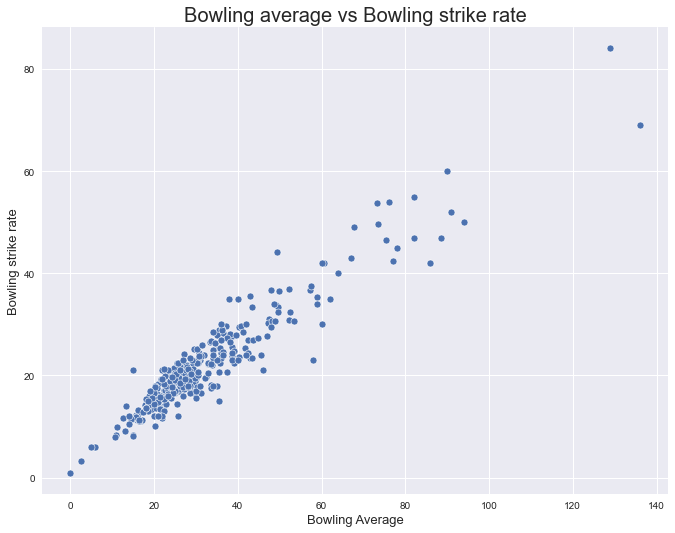

In [373]:
#Plotting

plt.figure(figsize=(10,8))
sns.scatterplot(bowling_stats.bowling_average,
                bowling_stats.bowling_strike_rate)

#Labelling
plt.xlabel('Bowling Average',fontdict={'fontsize':13})
plt.ylabel('Bowling strike rate',fontdict={'fontsize':13})
plt.title('Bowling average vs Bowling strike rate',fontdict={'fontsize':20})
plt.show()

- This is a clear evidence that players with higher bowling average have higher bowling strike rate.

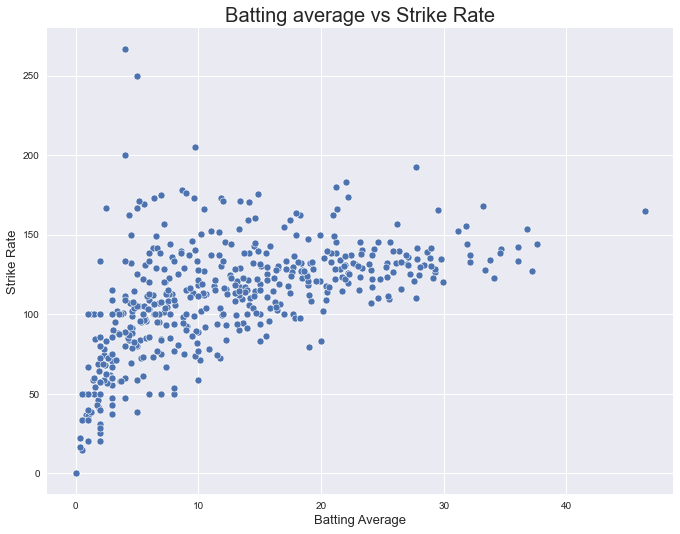

In [374]:
#Plotting
plt.figure(figsize=(10,8))
sns.scatterplot(batting_stats.batting_average,batting_stats.strike_rate)

#Labelling
plt.xlabel('Batting Average',fontdict={'fontsize':13})
plt.ylabel('Strike Rate',fontdict={'fontsize':13})
plt.title('Batting average vs Strike Rate',fontdict={'fontsize':20})

plt.show()

- We can observe that most of the players with high strike rates have low batting average. 


- By this we can infer that the players whose strike rate is high tends to get out earlier.

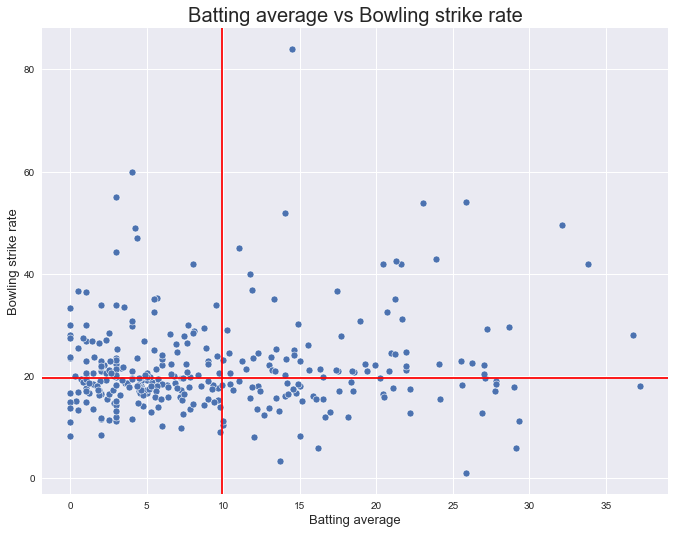

In [376]:
#Plotting

plt.figure(figsize=(10,8))
sns.scatterplot(batting_stats.batting_average,bowling_stats.bowling_strike_rate)

plt.axvline(batting_stats.batting_average.median(),c='r')
plt.axhline(bowling_stats.bowling_strike_rate.median(),c='r')

#Labelling
plt.xlabel('Batting average',fontdict={'fontsize':13})
plt.ylabel('Bowling strike rate',fontdict={'fontsize':13})
plt.title('Batting average vs Bowling strike rate',fontdict={'fontsize':20})
plt.show()

- Veritical axis line represents the median of batting average of all the players.


- Horizontal axis line represents the median of the Bowling strike rate of all the players.


- The players whose batting average is above the median of batting average of all the players and bowling strike rate below the median of all the players can be considered to be good **all-rounders**.

In [300]:
#By using the above information and using filtering conditions, we can extract top performing players in both batting
#and bowling


player_statistics[(player_statistics.batting_average>10)&
                  (player_statistics.bowling_strike_rate<20)&
                  (player_statistics.number_of_matches_bowled>50)].sort_values(['runs_scored','number_of_wickets'],
                                                                              ascending=False)

,runs_scored,balls_faced,strike_rate,Number_of_matches_batted,batting_average,number_of_wickets,number_of_deliveries,overs_bowled,number_of_matches_bowled,total_runs_conceeded,bowling_average,bowling_strike_rate,bowling_economy
SR Watson,3614,2555,141.448141,130,27.800000,107,1982,330.33,105,2690,25.140187,18.523364,8.143372
KA Pollard,2784,1869,148.956661,132,21.090909,67,1184,197.33,81,1770,26.417910,17.671642,8.969746
DJ Bravo,1498,1148,130.487805,99,15.131313,168,2535,422.50,131,3651,21.732143,15.089286,8.641420
AD Russell,1444,749,192.790387,52,27.769231,60,1021,170.17,61,1551,25.850000,17.016667,9.114415
HH Pandya,1118,688,162.500000,61,18.327869,45,851,141.83,60,1341,29.800000,18.911111,9.454981
JA Morkel,975,683,142.752562,67,14.552239,96,1686,281.00,87,2359,24.572917,17.562500,8.395018
SP Narine,803,457,175.711160,54,14.870370,137,2524,420.67,109,2872,20.963504,18.423358,6.827204
Shakib Al Hasan,759,587,129.301533,46,16.500000,66,1310,218.33,62,1658,25.121212,19.848485,7.594009
JP Faulkner,527,385,136.883117,45,11.711111,76,1197,199.50,60,1799,23.671053,15.750000,9.017544
CH Morris,520,327,159.021407,37,14.054054,78,1260,210.00,61,1734,22.230769,16.153846,8.257143


- These players can be considered to be the top all rounders in the league by their statistics.

## Multivariate Analysis

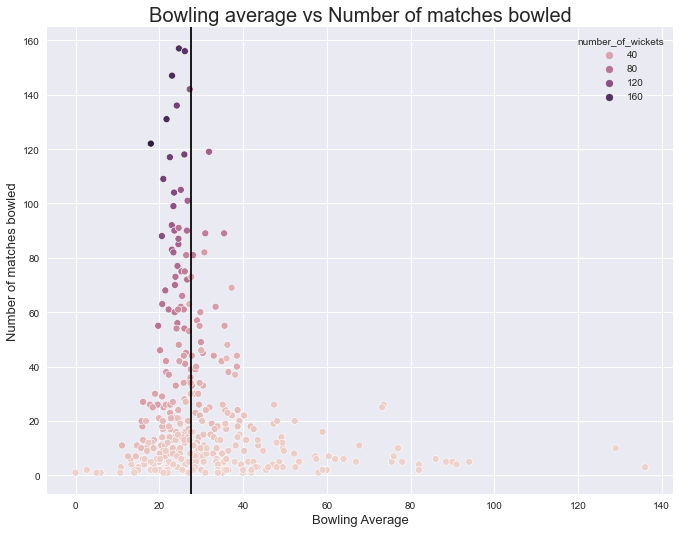

In [377]:
#Plotting
plt.figure(figsize=(10,8))
sns.scatterplot(bowling_stats.bowling_average,
                bowling_stats.number_of_matches_bowled,hue=bowling_stats.number_of_wickets)
plt.axvline(bowling_stats.bowling_average.median(),c='black')

#Labelling
plt.xlabel('Bowling Average',fontdict={'fontsize':13})
plt.ylabel('Number of matches bowled',fontdict={'fontsize':13})
plt.title('Bowling average vs Number of matches bowled',fontdict={'fontsize':20})
plt.show()

- Black vertical line represents the median bowling average of all the players. 


- We can clearly observe that players whose bowling average is less than the median has the highest number of matches played.


- Hue consists of data of number of wickets taken by the player. 

In [370]:
#By using the above information from the plot, we can find out best bowlers in the league by filtering.

bowling_stats[(bowling_stats.bowling_average<bowling_stats.bowling_average.median())&
                 (bowling_stats.number_of_matches_bowled>120)&
                 (bowling_stats.number_of_wickets>160)]

,number_of_wickets,number_of_deliveries,overs_bowled,number_of_matches_bowled,total_runs_conceeded,bowling_average,bowling_strike_rate,bowling_economy
SL Malinga,188,2753,458.83,122,3381,17.984043,14.643617,7.368742
DJ Bravo,168,2535,422.50,131,3651,21.732143,15.089286,8.641420
A Mishra,165,3069,511.50,147,3802,23.042424,18.600000,7.433040
Harbhajan Singh,161,3325,554.17,157,3976,24.695652,20.652174,7.174694


- These players can be considered to be best bowlers in the league.

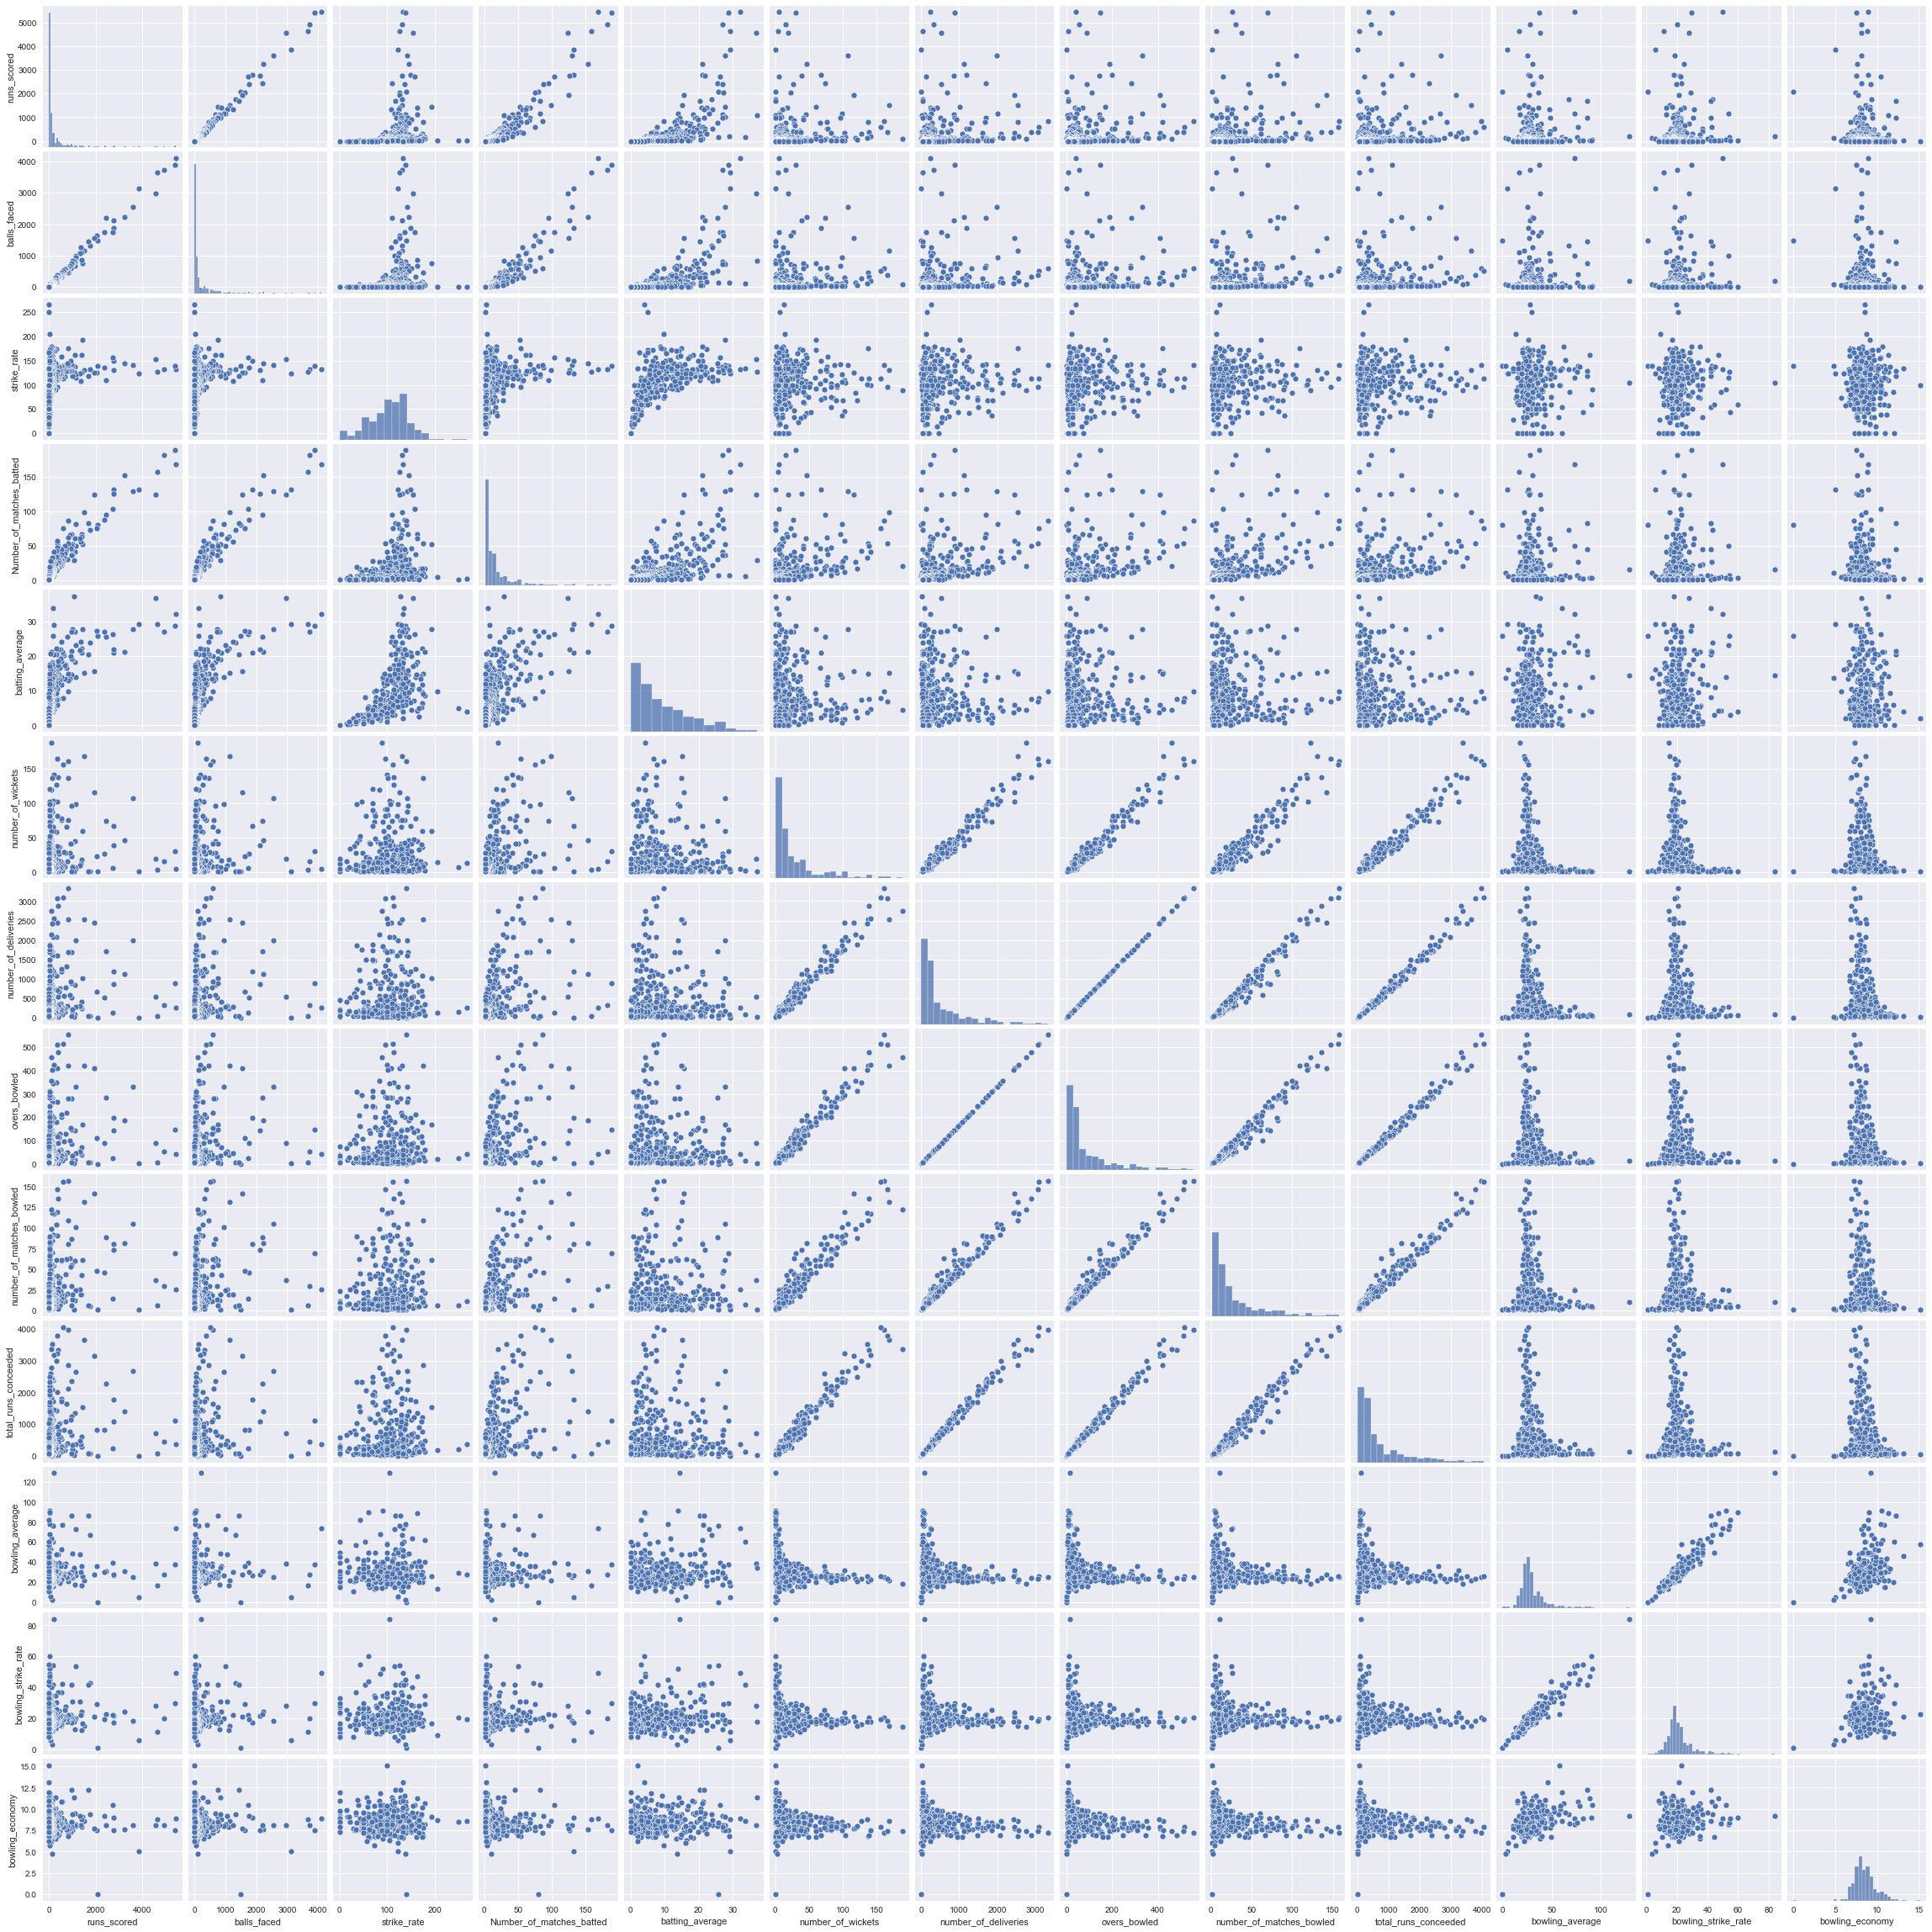

In [378]:
#Pair plot to view the relationship between all the variables.

sns.pairplot(player_statistics)

plt.show()

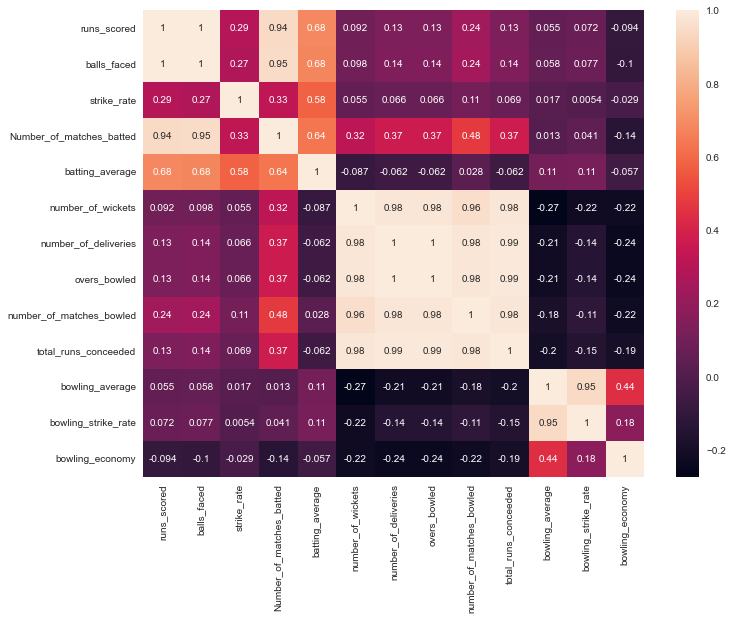

In [323]:
#Heat map to see the correlation between the variables

plt.figure(figsize=(10,8))
sns.heatmap(player_statistics.corr(),annot=True)

plt.show()

- The above plot is a correlation heat map of the player statistics data. 


- The strenght of the correlation between the two variables is based on the correlation value. The closer the value is closer to 1, higher the correlation between the variables.

## Observations and Inferences

#### Team analysis



1. **Rajasthan Royals**: Even though the team was a success in 2008 and won that season, there is a drastic downfall in the following seasons. 


2. **Kings X1 Punjab**: Except for the 2008 and 2014 seasons, this team has consistently maintained an even win-to-loss ratio.


3. **Chennai Super Kings**: This team is considered to be one of the most successful teams in the league. They have always maintained a positive win-to-loss ratio in all seasons. They won 3 seasons and only after Mumbai Indians as the highest number of seasons won.


4. **Delhi Daredevils**: This team performed well in the 2009 and 2012 seasons. But these 2 seasons do not represent their overall performance in IPL. They finished at the bottom in most of the seasons.


5. **Mumbai Indians**: This team can be considered one of the most successful teams in IPL. They had their worst season in 2009. They were not the best performers in the initial 2 seasons but are successful in the following seasons. This team won the most number of seasons(4).


6. **Kolkata Knight Riders**: This is a decent team with good performance in all the seasons. They were at their best form in the 2012 and 2014 seasons and won both seasons. 2009 is their worst performed season. They are the third-highest team to win the most number of seasons.


7. **Royal Challengers Bangalore**: This is a mid-team in most of the seasons. Performed well in the 2011 season. 2017 is their worst performed season.


8. **Deccan Chargers**: Participated only in 5 seasons. While the 2008 season is their worst performed season, the team showed positive progress in 2009 and went on to win that season. But, the team had a downfall trend in the lateral seasons until they quit the league.


9. **Sunrisers Hyderabad**: Entered the league in 2013. Performed well in all the seasons. They won the 2016 season.  


10. **Kochi Tuskers Kerala**: This team participated in only one season(2011). They won 6 matches and lost 8 with a win-loss ratio of 0.75.


11. **Pune Warriors**: This team participated in 3 seasons. They can be considered to be the most unsuccessful team in the league with an average win-loss ratio of 0.33.


12. **Gujarat Lions**: This team participated in 2 seasons. 2016 was their best performed season with 9 wins and 7 losses. 2017 was their worst performed season with 4 wins and 10 losses.


13. **Rising Pune Supergiants**: Participated only in one season. Won 5 matches and lost 9.


14. **Rising Pune Supergiant**: Participated only in one season. Won 10 matches and lost 6.


15. **Delhi Capitals**: This is the latest team to join the league and was successful in its first season. They were among the top 4 teams in that season with 10 wins and 6 losses.


- From the above analysis, we can observe that the top 4 successful teams by the win-loss ratio are Mumbai Indians, Chennai Super Kings, Sunrisers Hyderabad and Kolkata Knight Riders. Since Delhi capitals and Rising Pune Supergiant have the low number of matches played, they are not considered in the list. 


- Among these top 4 teams, **Mumbai Indians** can be considered to be the most successful team as it played the highest number of matches, amongst the top teams with the highest win-loss ratio and has won 4 seasons.



#### Player Analysis 


1. **V Kohli** followed by SK Raina and RG Sharma are the top run scorers in the league.


2. **DA Warner** is the player with highest batting average among the players who batted in more that 100 innings.


3. **CH Gayle** is the top player with respect to the maximum number of boundaries hit.


4. **AD Russell** has the highest strike rate among the players who played atleast 50 IPL innings.


5. **SL Malinga** is the highest wicket taker in the league.


6. **SL Malinga** has the best bowling average among the players who bowled in more than 50 matches.


7. **SL Malinga** has the best bowling strike rate among the players who bowled in more than 50 matches.


- Most of the batters who have batted more than 50 innings maintain batting strike rate between 120 and 140. It is possible that this criteria has a weightage to acquire their spot in the playing 11 as batsmen.


- **Virat Kohli** can be considered to be the most successful batsman in the league by the total runs scored, strike rate and the batting average


- **SL Malinga** can be considered to be the best bowler in the league by number of wickets taken, bowling average and bowling strike rate.


- **SR Watson**, **KA Pollard**, **DJ Bravo**, **AD Russell** and **HH Pandya** are the top 5 all rounders.


- The above mentioned players have a good marketable personalities in the league.


#### Analysis on Winning conditions


1. We can observe that teams who won the toss have won the matches in the majority of seasons. 



2. It is also noticed that the maximum impact of the toss is in the 2019 season where there is a huge difference between the teams who won after winning the toss and losing the toss. Teams who won the toss have won most number of matches.



3. It is observed that during the initial stages of the league, teams who opted to bat first won significant matches and as the seasons progressed, there is a downward trend of teams winning after choosing to bat first and an upward trend of the teams winning after winning the toss and choosing to bowl first. 



4. Teams conceeding less total of extra runs have a slightly better chance of winning than teams conceeding more total extra runs. But the huge difference is not noticed.



- By this, we can infer that teams winning the toss have a higher chance of winning the match than the teams losing the toss.



- It can be inferred from that teams who won the toss and opted to bowl first has won more number of matches that the teams opted to bat first as the league progressed.